In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import h5py

In [12]:
n0 = 2.0
def n ( r ) :
    if r <= 1.0 :
        return np.sqrt(n0**2 - (n0**2 - 1.0) * r**2)
    elif r > 1.0 :
        return 1.0
def dndr ( r ) :
    if r <= 1.0 :
        return -(n0**2-1.0)*r/np.sqrt(n0**2-(n0**2-1)*r**2)
    elif r > 1.0 : 
        return 0.0

In [27]:
def func ( x ) : # x = [r,p]
    return np.array([ x[1]/np.sqrt(n(x[0])**2-x[1]**2) ,
                     n(x[0])*dndr(x[0])/np.sqrt(n(x[0])**2-x[1]**2) ])

In [28]:
def RK(z,x0):

    k = np.zeros((4,2),dtype = 'complex64')
    x = np.zeros((z.size,2),dtype = 'complex64')
    x[0] = x0
    h = z[1]-z[0]

    for i in range(1, z.size):
        k[0] = func(x[i-1])
        k[1] = func(x[i-1]+h*k[0]/2)
        k[2] = func(x[i-1]+h*k[1]/2)
        k[3] = func(x[i-1]+h*k[2])

        x[i] = x[i-1]+h*(k[0]+2*k[1]+2*k[2]+k[3])/6
    return x

In [39]:
x0 = np.array([0.9, 0])
z = np.linspace(0, 10, 10000)
res = RK(z,x0)

Text(0.5, 0.98, 'Ray traced waveguide')

(-2.0, 2.0)

(0.0, 10.0)

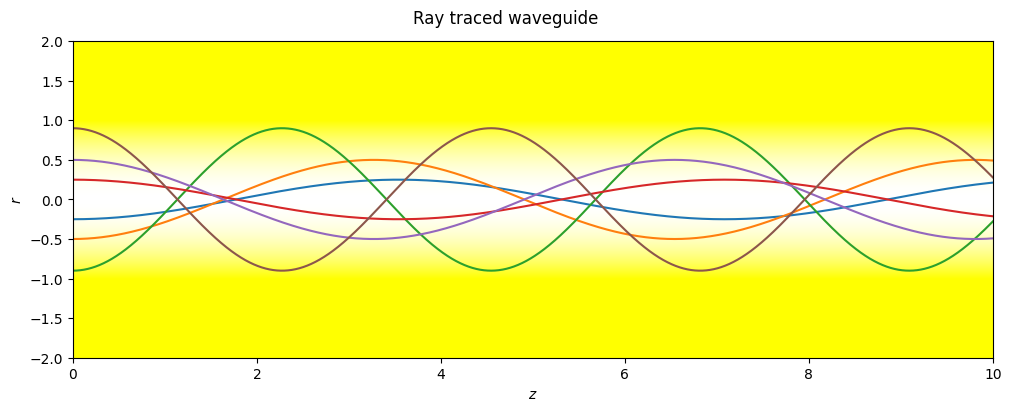

In [104]:
fig = plt.figure(figsize=(10,4), layout='constrained')
fig.suptitle(r'Ray traced waveguide')
ax1 = fig.add_subplot(1, 1, 1, title='', xlabel=r'$z$', ylabel=r'$r$')
#ax1.set_title('t=340.50 fs')
ax1.set_ylim([-2, 2])
x_max = 10.0
ax1.set_xlim([0, x_max])

x = np.linspace(0, x_max, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)

alpha = np.clip(Y**2, 0,1)

color = np.zeros((Y.shape[0], X.shape[1], 4))  # RGBA
color[..., 0:2] = 1.0  # blue channel
color[..., 3] = alpha  # alpha channel
ax1.imshow(color, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', aspect='auto')

z = np.linspace(0, x_max, 10000)
for i in [-0.25,-0.5,-0.9,0.25,0.5,0.9] :
    ax1.plot(z, RK(z,[i,0])[:,0]);